In [3]:
using LinearAlgebra
using SparseArrays
using Plots
using LaTeXStrings
using BenchmarkTools 


## Assignment 1
Assume that h = 1/2. Give the output of the piece of Julia code that constructs the vector $f^h$. Argue that the output is indeed the correct one.

In [2]:
N=2; 
 
Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N;h=1/N; h2=h*h; 

x = Vector(0:h:1);
Xh = collect(tuple(c,1-r) for r in x, c in x);

y = Vector(0:h:1); 
X = repeat(reshape(x, 1, :), length(y), 1);
Y = repeat(y, 1, length(x));
fsource(x,y)=2*pi*pi*sin(pi*x)*sin(pi*y);;
F=fsource.(X,Y);

IG = ones(Np1,Np1);
IG[2:end-1,2:end-1] = zeros(Nm1,Nm1);
IGvec = reshape(IG,Np2,1);
L = LinearIndices(IGvec);
interior_cartesian = findall(x->x==0,IGvec);
interior = L[interior_cartesian];
boundary_cartesian = findall(x->x>0,IGvec);
boundary = L[boundary_cartesian];

e = ones(Np1);            #..same as in 1D.. 
e_bnd = ones(Nbnd); #..used to handle the boundary nodes 

#..Construct one-dimensional matrix
A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A1 = (1/h2)*A1;
I = Diagonal(e); 
I_bnd = Diagonal(e_bnd); 



#..Construct the 2D matrix using Kronecker products 
Axx = kron(A1,I); 
Ayy = kron(I,A1); 
A = Axx+Ayy; 

F=fsource.(X,Y);
#..Reshape the F 2D array into an f vector 
f = reshape(F,Np2);

f_x = map(x->sin(pi*x), X)
f_y = map(y->sin(pi*y), Y)

f_a = 2*pi^2*(f_x.*f_y)
f_af = reshape(f_a,Np2)
display(f_af)
display(f)





9-element Vector{Float64}:
  0.0
  0.0
  0.0
  0.0
 19.739208802178716
  2.4173558877289423e-15
  0.0
  2.4173558877289423e-15
  2.9604071503072577e-31

9-element Vector{Float64}:
  0.0
  0.0
  0.0
  0.0
 19.739208802178716
  2.4173558877289423e-15
  0.0
  2.4173558877289423e-15
  2.9604071503072577e-31

Both the vectors f comes out to be same hence it is correct where one method was using map and broadcast operator and other method was using FDM. 

## Assignment 2
Assume that h = 1/2. Give the output of the piece of Julia code that constructs the matrix $A^h$. Argue that the output is indeed the correct one.

In [3]:
A

9×9 Matrix{Float64}:
 16.0  -4.0   0.0  -4.0   0.0   0.0   0.0   0.0   0.0
 -4.0  16.0  -4.0   0.0  -4.0   0.0   0.0   0.0   0.0
  0.0  -4.0  16.0   0.0   0.0  -4.0   0.0   0.0   0.0
 -4.0   0.0   0.0  16.0  -4.0   0.0  -4.0   0.0   0.0
  0.0  -4.0   0.0  -4.0  16.0  -4.0   0.0  -4.0   0.0
  0.0   0.0  -4.0   0.0  -4.0  16.0   0.0   0.0  -4.0
  0.0   0.0   0.0  -4.0   0.0   0.0  16.0  -4.0   0.0
  0.0   0.0   0.0   0.0  -4.0   0.0  -4.0  16.0  -4.0
  0.0   0.0   0.0   0.0   0.0  -4.0   0.0  -4.0  16.0


$$
\frac{\partial^2 u}{\partial x^2} (x_i, y_j) = \frac{u^h_{i-1,j} - 2u^h_{i,j} + u^h_{i+1,j}}{h^2} + \mathcal{O}(h^2) \quad \text{for} \quad 2 \leq i,j \leq N
$$

We know that this is the equation for finite different method using nearest neighbours we have the internal nodes.
The approzimation of partial differentiation equation is discretized on internal points which is written below:

$$
-\frac{u^h_{i,j-1} - u^h_{i-1,j} + 4u^h_{i,j} - u^h_{i+1,j} - u^h_{i,j+1}}{h^2} = f^h_{i,j} \quad \text{for} \quad 2 \leq i, j \leq N.
$$

This equation suugests that we get a tridiagonal matrix at the diagonal part and basically it satisfies that which we can see from the matrix defined in the above cell.

## Assignment 3 
Assume that h = 1/3. Give a plot of the non-zero structure of the coefficient matrix Ah using the spy command in the Plots package in Julia. Use e.g. the command spy(A, markercolor = :darkrainbow) to generate this plot. Argue that the output is indeed the correct one.

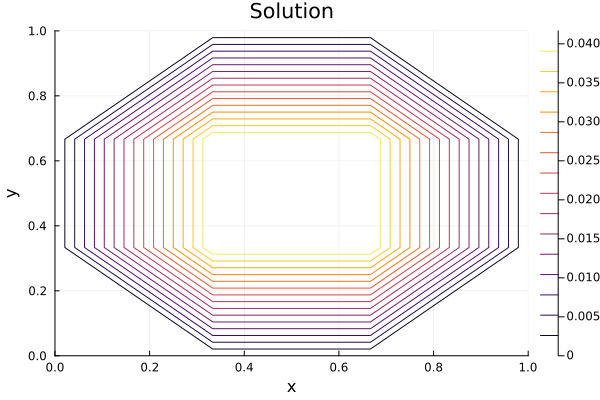

In [9]:
using LinearAlgebra
using SparseArrays
using Plots

# Parameters
N = 3
Np1 = N + 1
Nm1 = N - 1
Np2 = Np1 * Np1
Nm2 = Nm1 * Nm1
Nbnd = 4 * N
h = 1 / N
h2 = h * h

# Generate grid
x = collect(0:h:1)
Xh = collect((c, 1 - r) for r in x, c in x)

# Source function that accepts a tuple of coordinates
function fsource(coord)
    x, y = coord
    return sin(pi * x) * sin(pi * y)
end

F = fsource.(Xh)

# Initialize index grid
IG = ones(Np1, Np1)
IG[2:end-1, 2:end-1] = zeros(Nm1, Nm1)
IGvec = reshape(IG, Np2, 1)
L = LinearIndices(IGvec)
interior_cartesian = findall(x -> x == 0, IGvec)
interior = L[interior_cartesian]
boundary_cartesian = findall(x -> x > 0, IGvec)
boundary = L[boundary_cartesian]

# Create matrices
e = ones(Np1)
e_bnd = ones(Nbnd)

# Construct 1D matrix
A1 = Tridiagonal(-e[2:end], 2 * e, -e[2:end])
A1 = (1 / h2) * A1
I = Diagonal(e)
I_bnd = Diagonal(e_bnd)

# Construct the 2D matrix using Kronecker products
Axx = kron(A1, I)
Ayy = kron(I, A1)
A = Axx + Ayy

# Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector
A[boundary, boundary] = I_bnd
A[boundary, interior] = zeros(Nbnd, Nm2)

# Reshape the F 2D array into an f vector
f = reshape(F, Np2)
f[boundary] = zeros(Nbnd)

# Solve the system
u = A \ f

# Reshape solution to 2D and plot
u2d = reshape(u, Np1, Np1)
plot(x, x, u2d, title="Solution", xlabel="x", ylabel="y", zlabel="u")


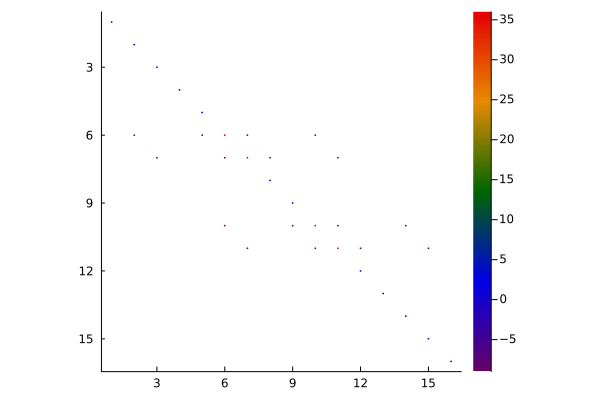

In [10]:
spy(A,markercolor = :darkrainbow)

The matrix defined in the cell before the spy shows all the non zero and zero elements. So basically 'spy(A,markercolor = :darkrainbow)' this command depicts the non zero elements byb dots with colours representating the value of the dot. While all the zero elements are no considered and thus are blank.

## Assignment 4
Assume that the exact solution $u_{ex}(xy)$ is given by $u_{ex}(xy) = x(x-1)\cdot y(y-1)\cdot(x^2)(y^3)$. Compute using pen and paper the source function f(xy) such that $f(xy) = - \Delta u(xy)$. Assume that h = 1/8, h = 1/16 and h = 1/32. Compute the finite difference approximation uh for these three values of h. Evaluate the difference between the finite difference approximation uh and the analytically given exact solution uex(xy) in the grid nodes. Give a contour plot of this difference for the three values of h considered. Make sure to include a legend explaining the values in the contour plot. Discuss the plots obtained.

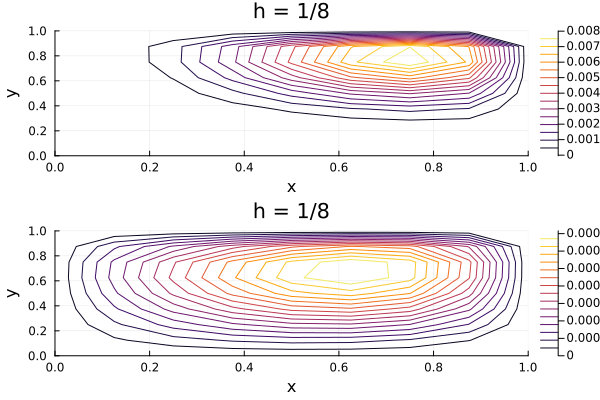

In [11]:
#..set number of intervals (N)
N = 8; 
#..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; h = 1/N; h2=h*h; 

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
x = Vector(0:h:1); 
y = Vector(0:h:1); 
X = repeat(reshape(x, 1, :), length(y), 1);
Y = repeat(y, 1, length(x));

f1(x,y) = (x^4-x^3)*(y^5-y^4)
Z=f1.(X,Y)


#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
IG = ones(Np1,Np1); 
IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
L = LinearIndices(IGvec); 
interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 

#..construct auxiliary vectors used in the 1D code as well 
e = ones(Np1);            #..same as in 1D.. 
e_bnd = ones(Nbnd); #..used to handle the boundary nodes 

#..Construct one-dimensional matrix
A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A1 = (1/h2)*A1;
I = Diagonal(e); 
I_bnd = Diagonal(e_bnd); 

#..Construct the 2D matrix using Kronecker products 
Axx = kron(A1,I); 
Ayy = kron(I,A1); 
A = Axx+Ayy; 

#..Construct the right-hand side vector 
#..Define the source function 
#..Observe the use of double brackets to make f work on a tuple of coordinates (x,y)
sourceterm(x,y) = -(12 * x.^2 .- 6 .* x) .* (y.^5 .- y.^4) - (x.^4 .- x.^3) .* (20 * y.^3 .- 12 .* y.^2);

#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
f = reshape(F,Np2); 

#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
f[boundary] = zeros(Nbnd); 


#..solve the linear system for the finite difference approximation 
u = A \ f; 

#..reshape the computed approximation 
U = reshape(u,Np1,Np1); 

error = Z-U;

error_norm = norm(error)

p1 = contour(x, y, U, title="h = 1/8", xlabel="x", ylabel="y", legend=:topright)
p2 = contour(x, y, error, title="h = 1/8", xlabel="x", ylabel="y", legend=:topright)
plot(p1,p2,layout=(2,1))

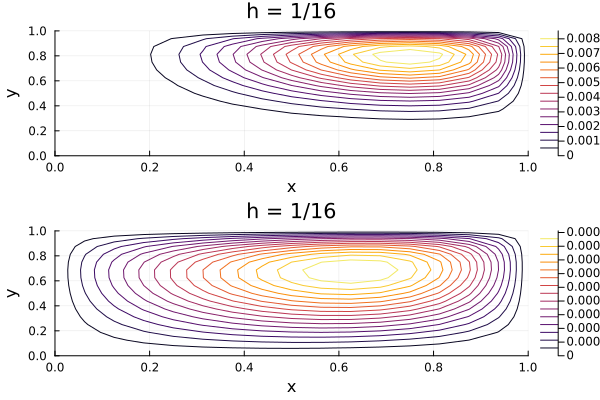

In [12]:
#..set number of intervals (N)
N = 16; 
#..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; h = 1/N; h2=h*h; 

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
x = Vector(0:h:1); 
y = Vector(0:h:1); 
X = repeat(reshape(x, 1, :), length(y), 1);
Y = repeat(y, 1, length(x));

f1(x,y) = (x^4-x^3)*(y^5-y^4)
Z=f1.(X,Y)


#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
IG = ones(Np1,Np1); 
IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
L = LinearIndices(IGvec); 
interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 

#..construct auxiliary vectors used in the 1D code as well 
e = ones(Np1);            #..same as in 1D.. 
e_bnd = ones(Nbnd); #..used to handle the boundary nodes 

#..Construct one-dimensional matrix
A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A1 = (1/h2)*A1;
I = Diagonal(e); 
I_bnd = Diagonal(e_bnd); 

#..Construct the 2D matrix using Kronecker products 
Axx = kron(A1,I); 
Ayy = kron(I,A1); 
A = Axx+Ayy; 

#..Construct the right-hand side vector 
#..Define the source function 
#..Observe the use of double brackets to make f work on a tuple of coordinates (x,y)
sourceterm(x,y) = -(12 * x.^2 .- 6 .* x) .* (y.^5 .- y.^4) - (x.^4 .- x.^3) .* (20 * y.^3 .- 12 .* y.^2);

#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
f = reshape(F,Np2); 

#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
f[boundary] = zeros(Nbnd); 


#..solve the linear system for the finite difference approximation 
u = A \ f; 

#..reshape the computed approximation 
U = reshape(u,Np1,Np1); 

error = Z-U;

error_norm = norm(error)

p1 = contour(x, y, U, title="h = 1/16", xlabel="x", ylabel="y", legend=:topright)
p2 = contour(x, y, error, title="h = 1/16", xlabel="x", ylabel="y", legend=:topright)
plot(p1,p2,layout=(2,1))

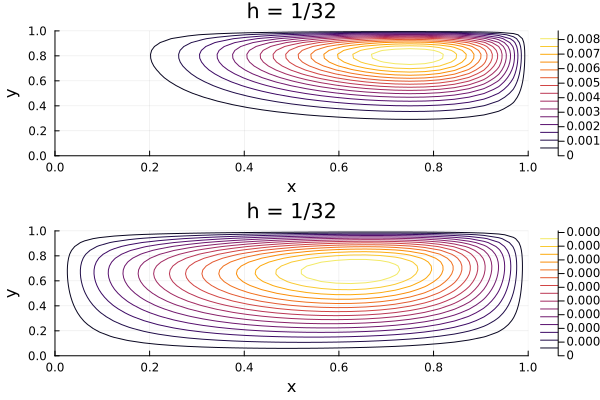

In [13]:
#..set number of intervals (N)
N = 32; 
#..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; h = 1/N; h2=h*h; 

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
x = Vector(0:h:1); 
y = Vector(0:h:1); 
X = repeat(reshape(x, 1, :), length(y), 1);
Y = repeat(y, 1, length(x));

f1(x,y) = (x^4-x^3)*(y^5-y^4)
Z=f1.(X,Y)


#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
IG = ones(Np1,Np1); 
IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
L = LinearIndices(IGvec); 
interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 

#..construct auxiliary vectors used in the 1D code as well 
e = ones(Np1);            #..same as in 1D.. 
e_bnd = ones(Nbnd); #..used to handle the boundary nodes 

#..Construct one-dimensional matrix
A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A1 = (1/h2)*A1;
I = Diagonal(e); 
I_bnd = Diagonal(e_bnd); 

#..Construct the 2D matrix using Kronecker products 
Axx = kron(A1,I); 
Ayy = kron(I,A1); 
A = Axx+Ayy; 

#..Construct the right-hand side vector 
#..Define the source function 
#..Observe the use of double brackets to make f work on a tuple of coordinates (x,y)
sourceterm(x,y) = -(12 * x.^2 .- 6 .* x) .* (y.^5 .- y.^4) - (x.^4 .- x.^3) .* (20 * y.^3 .- 12 .* y.^2);

#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
f = reshape(F,Np2); 

#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
f[boundary] = zeros(Nbnd); 


#..solve the linear system for the finite difference approximation 
u = A \ f; 

#..reshape the computed approximation 
U = reshape(u,Np1,Np1); 

error = Z-U;

error_norm = norm(error)

p1 = contour(x, y, U, title="h = 1/32", xlabel="x", ylabel="y", legend=:topright)
p2 = contour(x, y, error, title="h = 1/32", xlabel="x", ylabel="y", legend=:topright)
plot(p1,p2,layout=(2,1))

All the plots have been made and as one can see with increase in elements the contour plot gets smoother because mesh becomes more fine. The error range for each of the contour plot ranges in 10^-3 showcasing that the error is very low.

## Assignment 5
Assume that h = 1/8, h = 1/16, h = 1/32 and h = 1/64 and compare the CPU time required by the following two approaches to compute the finite difference approximation. The first approach is the one outlined above and uses the backslash command. In the second approach, first compute B =(Ah) 1. Next compute $u^h = B*f^h$. Give a bar plot compare both approaches for various values of h. Use the macro @btime provided by BenchmarkTools.jl to measure the CPU time.

In [14]:
N=8
    #..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
    Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; h = 1/N; h2=h*h; 

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
    x = Vector(0:h:1); 
    y = Vector(0:h:1); 
    X = repeat(reshape(x, 1, :), length(y), 1);
    Y = repeat(y, 1, length(x));

#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
    IG = ones(Np1,Np1); 
    IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
    IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
    L = LinearIndices(IGvec); 
    interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
    boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 

#..construct auxiliary vectors used in the 1D code as well 
    e = ones(Np1);            #..same as in 1D.. 
    e_bnd = ones(Nbnd); #..used to handle the boundary nodes 

#..Construct one-dimensional matrix
    A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
    A1 = (1/h2)*A1;
    I = Diagonal(e); 
    I_bnd = Diagonal(e_bnd); 

#..Construct the 2D matrix using Kronecker products 
    Axx = kron(A1,I); 
    Ayy = kron(I,A1); 
    A = Axx+Ayy; 

#..Construct the right-hand side vector 
#..Define the source function 
#..Observe the use of double brackets to make f work on a tuple of coordinates (x,y)
    sourceterm(x,y) = -(12 * x.^2 .- 6 .* x) .* (y.^5 .- y.^4) .- (x.^4 .- x.^3) .* (20 * y.^3 .- 12 .* y.^2);
#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
    F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
    f = reshape(F,Np2); 

#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
    A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
    f[boundary] = zeros(Nbnd); 

#..solve the linear system for the finite difference approximation 
    u = A \ f; 

#..reshape the computed approximation 
    U = reshape(u,Np1,Np1); 
    
    

In [15]:
@btime u = A \ f;

  33.600 μs (4 allocations: 52.80 KiB)


In [16]:
function b(A)
    B = inv(A)
    u = B * f
    return u
end
@btime b(A)

  463.200 μs (6 allocations: 93.42 KiB)


81-element Vector{Float64}:
  0.0
  0.0
 -3.194320392403756e-19
  0.0
 -2.1084396281750559e-16
  0.0
 -6.92691417307183e-17
  0.0
  0.0
  0.0
 -1.8407362345557125e-5
 -3.503537939723534e-5
 -4.202992027914496e-5
  ⋮
  0.00641578523011113
  0.005981860837512327
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

In [17]:
N=16
    #..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
    Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; h = 1/N; h2=h*h; 

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
    x = Vector(0:h:1); 
    y = Vector(0:h:1); 
    X = repeat(reshape(x, 1, :), length(y), 1);
    Y = repeat(y, 1, length(x));

#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
    IG = ones(Np1,Np1); 
    IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
    IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
    L = LinearIndices(IGvec); 
    interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
    boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 

#..construct auxiliary vectors used in the 1D code as well 
    e = ones(Np1);            #..same as in 1D.. 
    e_bnd = ones(Nbnd); #..used to handle the boundary nodes 

#..Construct one-dimensional matrix
    A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
    A1 = (1/h2)*A1;
    I = Diagonal(e); 
    I_bnd = Diagonal(e_bnd); 

#..Construct the 2D matrix using Kronecker products 
    Axx = kron(A1,I); 
    Ayy = kron(I,A1); 
    A = Axx+Ayy; 

#..Construct the right-hand side vector 
#..Define the source function 
#..Observe the use of double brackets to make f work on a tuple of coordinates (x,y)
    sourceterm(x,y) = -(12 * x.^2 .- 6 .* x) .* (y.^5 .- y.^4) .- (x.^4 .- x.^3) .* (20 * y.^3 .- 12 .* y.^2);
#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
    F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
    f = reshape(F,Np2); 

#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
    A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
    f[boundary] = zeros(Nbnd); 

#..solve the linear system for the finite difference approximation 
    u = A \ f; 

#..reshape the computed approximation 
    U = reshape(u,Np1,Np1); 
    
    

In [18]:
@btime u = A \ f;

  141.454 ms (4 allocations: 657.48 KiB)


In [19]:
@btime b(A)

  276.734 ms (6 allocations: 802.11 KiB)


289-element Vector{Float64}:
  0.0
  0.0
  0.0
  2.7996087554185354e-19
 -7.380475612859727e-16
  1.3161326454907274e-18
 -5.680551314456055e-17
  6.184358680530766e-18
  1.7767145567353442e-16
  1.0879754756159449e-17
  7.561464513955404e-16
  1.0008913067743049e-17
  2.823866884233767e-16
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

In [20]:
N=32
    #..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
    Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; h = 1/N; h2=h*h; 

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
    x = Vector(0:h:1); 
    y = Vector(0:h:1); 
    X = repeat(reshape(x, 1, :), length(y), 1);
    Y = repeat(y, 1, length(x));

#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
    IG = ones(Np1,Np1); 
    IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
    IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
    L = LinearIndices(IGvec); 
    interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
    boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 

#..construct auxiliary vectors used in the 1D code as well 
    e = ones(Np1);            #..same as in 1D.. 
    e_bnd = ones(Nbnd); #..used to handle the boundary nodes 

#..Construct one-dimensional matrix
    A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
    A1 = (1/h2)*A1;
    I = Diagonal(e); 
    I_bnd = Diagonal(e_bnd); 

#..Construct the 2D matrix using Kronecker products 
    Axx = kron(A1,I); 
    Ayy = kron(I,A1); 
    A = Axx+Ayy; 

#..Construct the right-hand side vector 
#..Define the source function 
#..Observe the use of double brackets to make f work on a tuple of coordinates (x,y)
    sourceterm(x,y) = -(12 * x.^2 .- 6 .* x) .* (y.^5 .- y.^4) .- (x.^4 .- x.^3) .* (20 * y.^3 .- 12 .* y.^2);
#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
    F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
    f = reshape(F,Np2); 

#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
    A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
    f[boundary] = zeros(Nbnd); 

#..solve the linear system for the finite difference approximation 
    u = A \ f; 

#..reshape the computed approximation 
    U = reshape(u,Np1,Np1); 
    
    

In [21]:
@btime u = A \ f;

  652.312 ms (4 allocations: 9.06 MiB)


In [22]:
@btime b(A)

  2.358 s (6 allocations: 9.60 MiB)


1089-element Vector{Float64}:
  0.0
  0.0
  0.0
 -6.207244549930723e-20
  1.4684300630385215e-18
 -7.19729522686581e-20
 -2.5330135825940395e-16
  7.503771611763286e-19
 -4.747247981071722e-17
  0.0
  3.730197543498458e-18
  2.81387086889016e-18
 -3.043992209550474e-15
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

In [23]:
N=64
    #..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
    Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; h = 1/N; h2=h*h; 

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
    x = Vector(0:h:1); 
    y = Vector(0:h:1); 
    X = repeat(reshape(x, 1, :), length(y), 1);
    Y = repeat(y, 1, length(x));

#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
    IG = ones(Np1,Np1); 
    IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
    IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
    L = LinearIndices(IGvec); 
    interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
    boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 

#..construct auxiliary vectors used in the 1D code as well 
    e = ones(Np1);            #..same as in 1D.. 
    e_bnd = ones(Nbnd); #..used to handle the boundary nodes 

#..Construct one-dimensional matrix
    A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
    A1 = (1/h2)*A1;
    I = Diagonal(e); 
    I_bnd = Diagonal(e_bnd); 

#..Construct the 2D matrix using Kronecker products 
    Axx = kron(A1,I); 
    Ayy = kron(I,A1); 
    A = Axx+Ayy; 

#..Construct the right-hand side vector 
#..Define the source function 
#..Observe the use of double brackets to make f work on a tuple of coordinates (x,y)
    sourceterm(x,y) = -(12 * x.^2 .- 6 .* x) .* (y.^5 .- y.^4) .- (x.^4 .- x.^3) .* (20 * y.^3 .- 12 .* y.^2);
#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
    F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
    f = reshape(F,Np2); 

#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
    A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
    f[boundary] = zeros(Nbnd); 

#..solve the linear system for the finite difference approximation 
    u = A \ f; 

#..reshape the computed approximation 
    U = reshape(u,Np1,Np1); 
    
    

In [24]:
@btime u = A \ f;

  6.456 s (6 allocations: 136.25 MiB)


In [25]:
@btime b(A)

  12.903 s (8 allocations: 138.32 MiB)


4225-element Vector{Float64}:
  0.0
  0.0
  0.0
 -5.6130179635907436e-21
 -1.4308117119480997e-17
 -4.525394592838617e-20
 -1.066878951650775e-18
  1.0664864192502053e-19
 -4.086020181711416e-16
 -1.680153539976632e-20
 -1.2828821668624706e-17
  4.7750707263916475e-20
 -1.3962585483886303e-19
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

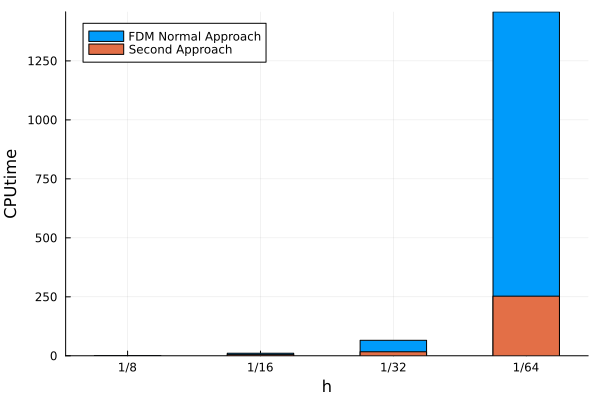

In [26]:
using StatsPlots
T = [0.0293, 4.853, 17.067, 252.740 ]
T_inv = [0.388, 10.868, 65.676, 1458]
h=[1/8,1/16,1/32,1/64]
bar(["1/8","1/16","1/32","1/64"],[T_inv,T],bar_width=0.5, ylabel="CPUtime", xlabel="h", label=["FDM Normal Approach" "Second Approach"])


## Assignment 6
Enforce the coefficient matrix to be a sparse matrix. Explore how much finer the meshes can be made

In [27]:
function t(N)
    #..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
    Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; h = 1/N; h2=h*h; 

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
    x = Vector(0:h:1); 
    y = Vector(0:h:1); 
    X = repeat(reshape(x, 1, :), length(y), 1);
    Y = repeat(y, 1, length(x));

#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
    IG = ones(Np1,Np1); 
    IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
    IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
    L = LinearIndices(IGvec); 
    interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
    boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 

#..construct auxiliary vectors used in the 1D code as well 
    e = ones(Np1);            #..same as in 1D.. 
    e_bnd = ones(Nbnd); #..used to handle the boundary nodes 

#..Construct one-dimensional matrix
    A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
    A1 = (1/h2)*A1;
    I = Diagonal(e); 
    I_bnd = Diagonal(e_bnd); 

#..Construct the 2D matrix using Kronecker products 
    Axx = kron(A1,I); 
    Ayy = kron(I,A1); 
    A = Axx+Ayy; 

#..Construct the right-hand side vector 
#..Define the source function 
#..Observe the use of double brackets to make f work on a tuple of coordinates (x,y)
    sourceterm(x,y) = -(12 * x.^2 .- 6 .* x) .* (y.^5 .- y.^4) .- (x.^4 .- x.^3) .* (20 * y.^3 .- 12 .* y.^2);
#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
    F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
    f = reshape(F,Np2); 

#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
    A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
    f[boundary] = zeros(Nbnd); 
#..solve the linear system for the finite difference approximation 
    u = A \ f; 
    
#..reshape the computed approximation 
    U = reshape(u,Np1,Np1); 
    
end

t (generic function with 1 method)

In [28]:
function ts(N)
    #..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
    Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; h = 1/N; h2=h*h; 

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
    x = Vector(0:h:1); 
    y = Vector(0:h:1); 
    X = repeat(reshape(x, 1, :), length(y), 1);
    Y = repeat(y, 1, length(x));

#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
    IG = ones(Np1,Np1); 
    IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
    IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
    L = LinearIndices(IGvec); 
    interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
    boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 

#..construct auxiliary vectors used in the 1D code as well 
    e = ones(Np1);            #..same as in 1D.. 
    e_bnd = ones(Nbnd); #..used to handle the boundary nodes 

#..Construct one-dimensional matrix
    A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
    A1 = (1/h2)*A1;
    I = Diagonal(e); 
    I_bnd = Diagonal(e_bnd); 

#..Construct the 2D matrix using Kronecker products 
    Axx = kron(A1,I); 
    Ayy = kron(I,A1); 
    A = Axx+Ayy; 

#..Construct the right-hand side vector 
#..Define the source function 
#..Observe the use of double brackets to make f work on a tuple of coordinates (x,y)
    sourceterm(x,y) = -(12 * x.^2 .- 6 .* x) .* (y.^5 .- y.^4) .- (x.^4 .- x.^3) .* (20 * y.^3 .- 12 .* y.^2);
#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
    F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
    f = reshape(F,Np2); 

#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
    A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
    f[boundary] = zeros(Nbnd); 
    D=sparse(A)
#..solve the linear system for the finite difference approximation 
    u = D \ f; 
    
#..reshape the computed approximation 
    U = reshape(u,Np1,Np1); 
    
end

ts (generic function with 1 method)

In [ ]:
Ns = 1:100  # Range of N values
times_t = zeros(length(Ns))
times_ts = zeros(length(Ns))

for (i, N) in enumerate(Ns)
    # Measure time for function t
    result_t = @belapsed t($N)
    times_t[i] = result_t

    # Measure time for function ts
    result_ts = @belapsed ts($N)
    times_ts[i] = result_ts
end

# Plotting the results
plot(Ns, times_t, label="Dense Matrix", xlabel="N", ylabel="Time (seconds)", title="Computation Time vs N")
plot!(Ns, times_ts, label="Sparse Matrix")

This is taking very long time so I could not show the results but I have displayed below from 1 to 3 size. 

## Assignment 7
Extend your Julia implementation to treat the case in which the number of intervals in x and y direction differ. Assume that Nx and Ny denote the number of intervals in the x and y-direction, respectively. Assume that Nx = 16 and Ny = 32. Give a contour plot of the difference between uh and uex(xy).

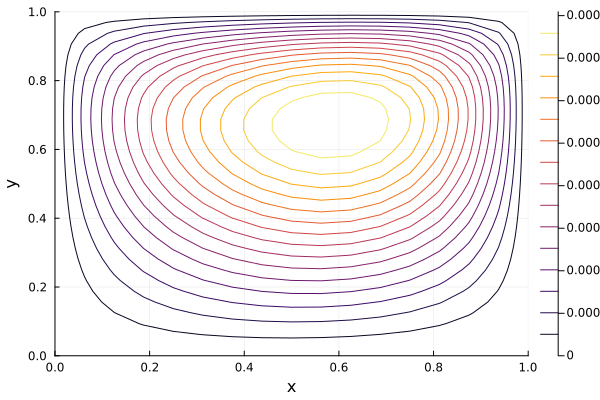

In [4]:
Nx = 16 
Ny = 32


Np1_x = Nx+1
Np1_y = Ny+1
Nm1_x = Nx-1 
Nm1_y = Ny-1

Np2 = Np1_x*Np1_y 
Nm2 = Nm1_x*Nm1_y 
Nbnd = 2*Ny+2*Nx 

hx = 1/Nx
hy = 1/Ny 
h2_x=hx*hx 
h2_y=hy*hy


x = Vector(0:hx:1)
y = Vector(0:hy:1) 
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))


IG = ones(Np1_y,Np1_x); 
IG[2:end-1,2:end-1] = zeros(Nm1_y,Nm1_x); 
IGvec = reshape(IG,Np2,1); 



L = LinearIndices(IGvec); 
interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 

#..construct auxiliary vectors used in the 1D code as well with Nx and Ny
e_x = ones(Np1_x);   #..same as in 1D.. 
e_y = ones(Np1_y);
e_bnd = ones(Nbnd); #..used to handle the boundary nodes 

#..Construct one-dimensional matrix
A1x = Tridiagonal(-e_x[2:end], 2*e_x, -e_x[2:end])
A1x = (1/h2_x)*A1x;
Ix = Diagonal(e_x);

A1y = Tridiagonal(-e_y[2:end], 2*e_y, -e_y[2:end])
A1y = (1/h2_y)*A1y;
Iy = Diagonal(e_y);

I_bnd = Diagonal(e_bnd); 


Axx = kron(A1x,Iy)
Ayy = kron(Ix,A1y)
A = Axx+Ayy;

#..construct the matrix enabling the computation of ux and uy 

#..Construct the right-hand side vector 
#..Define the source function

sourceterm(x,y) = -(12*x^2-6*x)*(y^5-y^4)-(x^4-x^3)*(20*y^3-12*y^2);

#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
f = reshape(F,Np2); 

#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector
A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
f[boundary] = zeros(Nbnd);

#..solve the linear system for the finite difference approximation 
u = A \ f; 

#..reshape the computed approximation 
U = reshape(u,Np1_y,Np1_x); 

F_A(x,y) = x*(x − 1)*y*(y − 1)*(x^2)*(y^3);

F_AF = F_A.(X, Y)

error = F_AF-U;

# Calculate the norm of the difference matrix
e_n= norm(error)

p1 = contour(x, y, error, xlabel="x", ylabel="y", legend=:topright)

In [5]:
e_n

0.00044461707937393913

## Assignment 8
Extend your Julia implementation to the case of the electrical field between two plates of a capacitor. Assume the space between the plates to be vacuum.

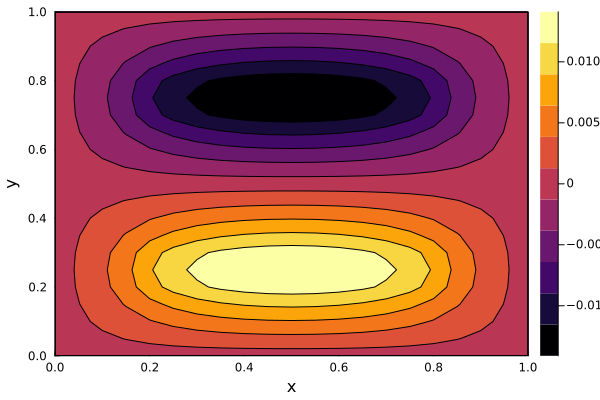

In [6]:
#..set number of intervals (N)
N = 20; 
#..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; h = 1/N; h2=h*h; 

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
x = Vector(0:h:1); 
y = Vector(0:h:1); 
X = repeat(reshape(x, 1, :), length(y), 1);
Y = repeat(y, 1, length(x));
xmid = x[1:end-1].+h/2; 
ymid = y[1:end-1].+h/2; 

#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
IG = ones(Np1,Np1); 
IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
L = LinearIndices(IGvec); 
interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 
upper_boundary = Np1:Np1:Np2 
lower_boundary = 1:Np1:Np2-Np1+1

#..construct auxiliary vectors used in the 1D code as well 
e = ones(Np1);            #..same as in 1D.. 
e_bnd = ones(Nbnd); #..used to handle the boundary nodes 




#..Construct one-dimensional matrix
A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A1 = (1/h2)*A1;
I = Diagonal(e); 
I_bnd = Diagonal(e_bnd); 

#..construct the matrix enabling the computation of ux and uy  
#..we use comprehension to construct the rectangular matrix B 
B = [i==j ? -1/h : i==j-1 ? 1/h : 0 for i = 1:N, j=1:Np1]


Axx = kron(A1,I) 
Ayy= kron(I,A1)

Axx[:, 1] .= 1/h
Axx[:, end] .= 1/h


A = Axx+Ayy
Bx = kron(B,I);
By = kron(I,B);
# Apply Dirichlet conditions to the matrix A
A[upper_boundary, :] .= 0 # Set the entire rows to 0
A[upper_boundary, upper_boundary] .= 1 # Set diagonal to 1
A[lower_boundary, :] .= 0 # Set the entire rows to 0
A[lower_boundary, lower_boundary] .= 1 # Set diagonal to 1


#..Construct the right-hand side vector 
#..Define the source function 
#..Observe the use of double brackets to make f work on a tuple of coordinates (x,y)
#sourceterm(x,y) = exp(-((y .- 0.5).^2 ./ 0.1.^2))
sourceterm(x,y) = (x.>=.2).*(x.<=.8).*(y.>=.20).*(y.<=.30) .- (x.>=.2).*(x.<=.8).*(y.>=.70).*(y.<=.80); 
#sourceterm(x,y) = exp((-(y.-1).^2) ./0.1.^2)*(-2*(y-0.5) ./0.1.^2)*(-1)
#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
f = reshape(F,Np2); 

# Apply Dirichlet conditions to the vector f
f[lower_boundary] .= 0 # Set right-hand side to 0 for lower boundary
f[upper_boundary] .= 1 # Set right-hand side to 1 for upper boundary



#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
f[boundary] = zeros(Nbnd); 

#..solve the linear system for the finite difference approximation 
u = A \ f; 
ux = -Bx*u; 
uy = -By*u; 

#..reshape the computed approximation 
#..observe the fact that Ux and Uy live on a coarser mesh 
U = reshape(u,Np1,Np1); 
Ux = reshape(ux,Np1,N); 
Uy = reshape(uy,N,Np1); 
#..plot the computed approximation as a contour plot 
p8 = contourf(x, y, U,levels=10, xlabel="x", ylabel="y")

p2 = heatmap(Ux,title="Ux", xlabel="x", ylabel="y")

#p3 = heatmap(Uy, xlabel="x", ylabel="y")
p3 = surface(x, y, F, xlabel="x", ylabel="y")

p4 = quiver(X,Y, quiver=(Ux,Uy)) 

plot(p8)

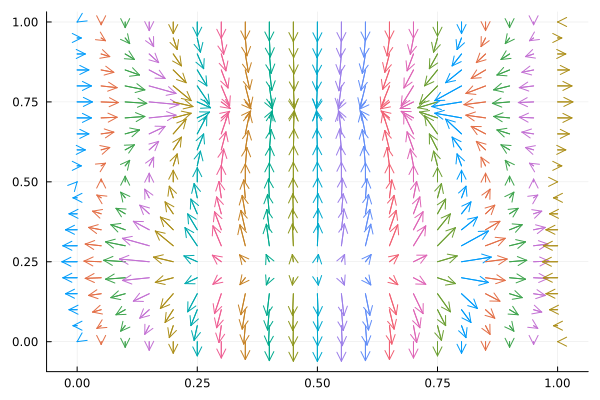

In [7]:
plot(p4)

# Assignment 9
Extend your Julia implementation to the case of the electrical field between two plates of a capacitor. Assume a dielectric object to be placed between the plates. Assume three values for the dielectric constant. It might be beneficial to consider a one-dimensional variant of the problem first.

21×21 Matrix{Float64}:
  1.7866e-16    0.0           4.14707e-18  …  -5.72585e-17   1.22392e-18  0.0
  2.25517e-18   2.61527e-5    5.61203e-5       5.61203e-5    2.61527e-5   0.0
  4.6243e-17    4.84904e-5    0.000110967      0.000110967   4.84904e-5   0.0
  1.62911e-16   5.68418e-5    0.000148326      0.000148326   5.68418e-5   0.0
  3.89786e-15   9.29005e-5    0.00024762       0.00024762    9.29005e-5   0.0
  7.26606e-16   0.000113504   0.000301     …   0.000301      0.000113504  0.0
  2.42889e-15   0.000115611   0.00029962       0.00029962    0.000115611  0.0
 -6.31417e-15   0.000100618   0.000250852      0.000250852   0.000100618  0.0
  3.72911e-16   7.322e-5      0.000176435      0.000176435   7.322e-5     0.0
 -3.02797e-16   3.83238e-5    9.03578e-5       9.03578e-5    3.83238e-5   0.0
  3.77227e-15   6.27097e-16   2.09727e-16  …  -2.10091e-17  -1.49058e-17  0.0
 -3.07198e-16  -3.83238e-5   -9.03578e-5      -9.03578e-5   -3.83238e-5   0.0
 -1.70705e-15  -7.322e-5     -0.000176435

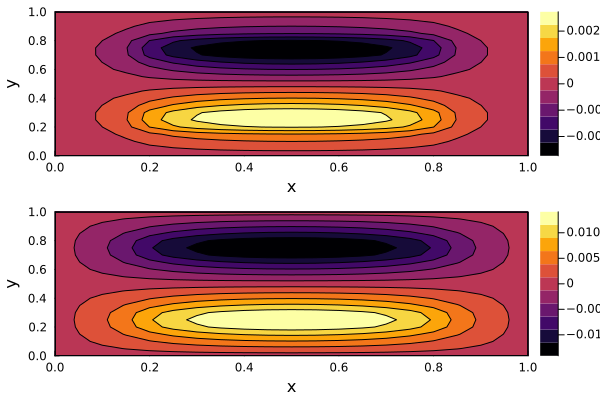

In [8]:
#..set number of intervals (N)
N = 20; 
#..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; h = 1/N; h2=h*h; 

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
x = Vector(0:h:1); 
y = Vector(0:h:1); 
X = repeat(reshape(x, 1, :), length(y), 1);
Y = repeat(y, 1, length(x));
xmid = x[1:end-1].+h/2; 
ymid = y[1:end-1].+h/2;

n = length(xmid)  # or length(ymid), since they should be the same

# Create a matrix where each element is 4
epsilon_matrix = fill(4, (n+1, n+1))
epsilon_matrix[: , 1] .= 1;
epsilon_matrix[: , end] .=1;
epsilon_matrix[1 , :] .= 1;
epsilon_matrix[end , :] .=1;
epsilon_matrix[: , 2] .= 1;
epsilon_matrix[: , end-1] .=1;
epsilon_matrix[2 , :] .= 1;
epsilon_matrix[end-1, :] .=1;
epsilon_matrix[: , 3] .= 1;
epsilon_matrix[: , end-2] .=1;
epsilon_matrix[3 , :] .= 1;
epsilon_matrix[end-2, :] .=1;



#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
IG = ones(Np1,Np1); 
IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
L = LinearIndices(IGvec); 
interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 
upper_boundary = Np1:Np1:Np2 
lower_boundary = 1:Np1:Np2-Np1+1

#..construct auxiliary vectors used in the 1D code as well 
e = ones(Np1);            #..same as in 1D.. 
e_bnd = ones(Nbnd); #..used to handle the boundary nodes 




#..Construct one-dimensional matrix
A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A1 = (1/h2)*A1;
A1 = A1.* epsilon_matrix
I = Diagonal(e); 
I_bnd = Diagonal(e_bnd); 

#..construct the matrix enabling the computation of ux and uy  
#..we use comprehension to construct the rectangular matrix B 
B = [i==j ? -1/h : i==j-1 ? 1/h : 0 for i = 1:N, j=1:Np1]


Axx = kron(A1,I) 
Ayy= kron(I,A1)

Axx[:, 1] .= 1/h
Axx[:, end] .= 1/h



A = Axx+Ayy
Bx = kron(B,I);
By = kron(I,B);

# Apply Dirichlet conditions to the matrix A
A[upper_boundary, :] .= 0 # Set the entire rows to 0
A[upper_boundary, upper_boundary] .= 1 # Set diagonal to 1
A[lower_boundary, :] .= 0 # Set the entire rows to 0
A[lower_boundary, lower_boundary] .= 1 # Set diagonal to 1


#..Construct the right-hand side vector 
#..Define the source function 
#..Observe the use of double brackets to make f work on a tuple of coordinates (x,y)
#sourceterm(x,y) = exp(-((y .- 0.5).^2 ./ 0.1.^2))
sourceterm(x,y) = (x.>=.2).*(x.<=.8).*(y.>=.20).*(y.<=.30) .- (x.>=.2).*(x.<=.8).*(y.>=.70).*(y.<=.80); 
#sourceterm(x,y) = exp((-(y.-1).^2) ./0.1.^2)*(-2*(y-0.5) ./0.1.^2)*(-1)
#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
f = reshape(F,Np2); 


# Apply Dirichlet conditions to the vector f
f[lower_boundary] .= 0 # Set right-hand side to 0 for lower boundary
f[upper_boundary] .= 1 # Set right-hand side to 1 for upper boundary
upper_boundary = Np1:Np1:Np2 
lower_boundary = 1:Np1:Np2-Np1+1



#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
f[boundary] = zeros(Nbnd); 

#..solve the linear system for the finite difference approximation 
u = A \ f; 
ux = -Bx*u; 
uy = -By*u; 

#..reshape the computed approximation 
#..observe the fact that Ux and Uy live on a coarser mesh 
U = reshape(u,Np1,Np1); 
Ux = reshape(ux,Np1,N); 
Uy = reshape(uy,N,Np1); 

display(U)

#..plot the computed approximation as a contour plot 
p1 = contourf(x, y, U,levels=10, xlabel="x", ylabel="y")

p2 = heatmap(Ux,title="Ux", xlabel="x", ylabel="y")

#p3 = heatmap(Uy, xlabel="x", ylabel="y")
p3 = surface(x, y, F, xlabel="x", ylabel="y")

p4 = quiver(X,Y, quiver=(Ux,Uy)) 

plot(p1,p2,p3,layout=(3,1))
plot(p1,p8,layout=(2,1))

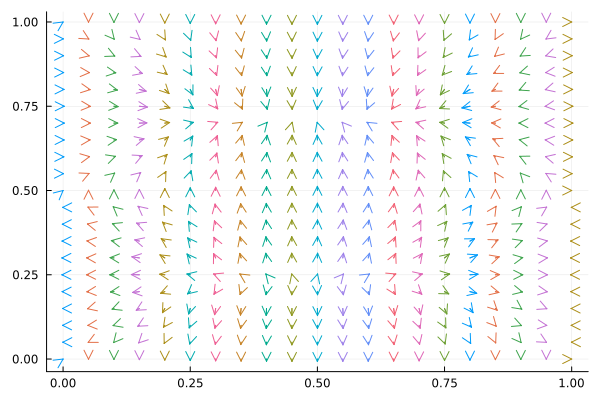

In [9]:
plot(p4)

21×21 Matrix{Float64}:
 -1.25869e-16   0.0           3.25261e-18  …   4.30492e-18   2.64695e-17  0.0
  3.63351e-18   8.38922e-5    0.0001747        0.0001747     8.38922e-5   0.0
  1.5615e-16    0.000160869   0.00034494       0.00034494    0.000160869  0.0
  1.79924e-15   0.000214643   0.000485826      0.000485826   0.000214643  0.0
  6.83827e-16   0.000320581   0.000742531      0.000742531   0.000320581  0.0
 -5.61557e-16   0.000375835   0.000871226  …   0.000871226   0.000375835  0.0
  1.63323e-16   0.00037131    0.000847876      0.000847876   0.00037131   0.0
 -1.66796e-15   0.000314157   0.000695534      0.000695534   0.000314157  0.0
 -1.32799e-15   0.000223394   0.00048167       0.00048167    0.000223394  0.0
 -3.11269e-15   0.000115191   0.000244355      0.000244355   0.000115191  0.0
 -9.57916e-16  -2.00049e-16  -8.43769e-17  …  -5.02904e-17  -3.10915e-17  0.0
  4.53752e-15  -0.000115191  -0.000244355     -0.000244355  -0.000115191  0.0
 -1.41077e-15  -0.000223394  -0.00048167 

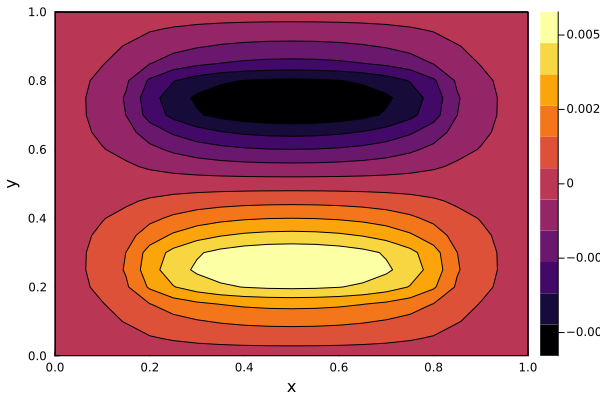

In [10]:
#..set number of intervals (N)
N = 20; 
#..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; h = 1/N; h2=h*h; 

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
x = Vector(0:h:1); 
y = Vector(0:h:1); 
X = repeat(reshape(x, 1, :), length(y), 1);
Y = repeat(y, 1, length(x));
xmid = x[1:end-1].+h/2; 
ymid = y[1:end-1].+h/2;

n = length(xmid)  # or length(ymid), since they should be the same

# Create a matrix where each element is 4
epsilon_matrix = fill(2, (n+1, n+1))
epsilon_matrix[: , 1] .= 1;
epsilon_matrix[: , end] .=1;
epsilon_matrix[1 , :] .= 1;
epsilon_matrix[end , :] .=1;
epsilon_matrix[: , 2] .= 1;
epsilon_matrix[: , end-1] .=1;
epsilon_matrix[2 , :] .= 1;
epsilon_matrix[end-1, :] .=1;
epsilon_matrix[: , 3] .= 1;
epsilon_matrix[: , end-2] .=1;
epsilon_matrix[3 , :] .= 1;
epsilon_matrix[end-2, :] .=1;



#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
IG = ones(Np1,Np1); 
IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
L = LinearIndices(IGvec); 
interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 
upper_boundary = Np1:Np1:Np2 
lower_boundary = 1:Np1:Np2-Np1+1

#..construct auxiliary vectors used in the 1D code as well 
e = ones(Np1);            #..same as in 1D.. 
e_bnd = ones(Nbnd); #..used to handle the boundary nodes 




#..Construct one-dimensional matrix
A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A1 = (1/h2)*A1;
A1 = A1.* epsilon_matrix
I = Diagonal(e); 
I_bnd = Diagonal(e_bnd); 

#..construct the matrix enabling the computation of ux and uy  
#..we use comprehension to construct the rectangular matrix B 
B = [i==j ? -1/h : i==j-1 ? 1/h : 0 for i = 1:N, j=1:Np1]


Axx = kron(A1,I) 
Ayy= kron(I,A1)

Axx[:, 1] .= 1/h
Axx[:, end] .= 1/h



A = Axx+Ayy
Bx = kron(B,I);
By = kron(I,B);

# Apply Dirichlet conditions to the matrix A
A[upper_boundary, :] .= 0 # Set the entire rows to 0
A[upper_boundary, upper_boundary] .= 1 # Set diagonal to 1
A[lower_boundary, :] .= 0 # Set the entire rows to 0
A[lower_boundary, lower_boundary] .= 1 # Set diagonal to 1


#..Construct the right-hand side vector 
#..Define the source function 
#..Observe the use of double brackets to make f work on a tuple of coordinates (x,y)
#sourceterm(x,y) = exp(-((y .- 0.5).^2 ./ 0.1.^2))
sourceterm(x,y) = (x.>=.2).*(x.<=.8).*(y.>=.20).*(y.<=.30) .- (x.>=.2).*(x.<=.8).*(y.>=.70).*(y.<=.80); 
#sourceterm(x,y) = exp((-(y.-1).^2) ./0.1.^2)*(-2*(y-0.5) ./0.1.^2)*(-1)
#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
f = reshape(F,Np2); 


# Apply Dirichlet conditions to the vector f
f[lower_boundary] .= 0 # Set right-hand side to 0 for lower boundary
f[upper_boundary] .= 1 # Set right-hand side to 1 for upper boundary
upper_boundary = Np1:Np1:Np2 
lower_boundary = 1:Np1:Np2-Np1+1



#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
f[boundary] = zeros(Nbnd); 

#..solve the linear system for the finite difference approximation 
u = A \ f; 
ux = -Bx*u; 
uy = -By*u; 

#..reshape the computed approximation 
#..observe the fact that Ux and Uy live on a coarser mesh 
U = reshape(u,Np1,Np1); 
Ux = reshape(ux,Np1,N); 
Uy = reshape(uy,N,Np1); 

display(U)

#..plot the computed approximation as a contour plot 
p1 = contourf(x, y, U,levels=10, xlabel="x", ylabel="y")

p2 = heatmap(Ux,title="Ux", xlabel="x", ylabel="y")

#p3 = heatmap(Uy, xlabel="x", ylabel="y")
p3 = surface(x, y, F, xlabel="x", ylabel="y")

p4 = quiver(X,Y, quiver=(Ux,Uy)) 

plot(p1,p2,p3,layout=(3,1))
plot(p1)

21×21 Matrix{Float64}:
  4.55236e-17   0.0          -4.45878e-18  …  -2.34463e-17   2.73388e-19  0.0
 -9.65641e-19   1.39279e-5    3.05136e-5       3.05136e-5    1.39279e-5   0.0
 -6.53372e-17   2.5198e-5     6.04943e-5       6.04943e-5    2.5198e-5    0.0
  2.71499e-17   2.63698e-5    7.74755e-5       7.74755e-5    2.63698e-5   0.0
  1.30464e-15   4.44173e-5    0.000133033      0.000133033   4.44173e-5   0.0
  9.0123e-16    5.50985e-5    0.000163717  …   0.000163717   5.50985e-5   0.0
 -3.92933e-15   5.68595e-5    0.000164632      0.000164632   5.68595e-5   0.0
  1.39844e-16   5.01351e-5    0.000139387      0.000139387   5.01351e-5   0.0
 -1.2457e-15    3.68912e-5    9.89543e-5       9.89543e-5    3.68912e-5   0.0
  6.4087e-15    1.94521e-5    5.09813e-5       5.09813e-5    1.94521e-5   0.0
  3.01389e-17   3.73433e-16   1.44557e-16  …  -8.70407e-18  -7.15487e-18  0.0
 -1.5828e-15   -1.94521e-5   -5.09813e-5      -5.09813e-5   -1.94521e-5   0.0
 -3.85852e-17  -3.68912e-5   -9.89543e-5 

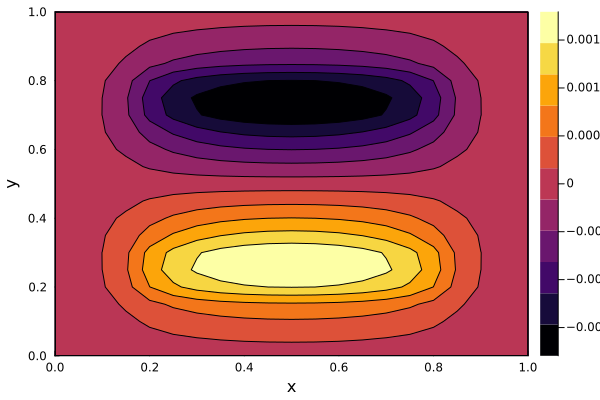

In [11]:
#..set number of intervals (N)
N = 20; 
#..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
Np1 = N+1; Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; h = 1/N; h2=h*h; 

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
x = Vector(0:h:1); 
y = Vector(0:h:1); 
X = repeat(reshape(x, 1, :), length(y), 1);
Y = repeat(y, 1, length(x));
xmid = x[1:end-1].+h/2; 
ymid = y[1:end-1].+h/2;

n = length(xmid)  # or length(ymid), since they should be the same

# Create a matrix where each element is 4
epsilon_matrix = fill(6, (n+1, n+1))
epsilon_matrix[: , 1] .= 1;
epsilon_matrix[: , end] .=1;
epsilon_matrix[1 , :] .= 1;
epsilon_matrix[end , :] .=1;
epsilon_matrix[: , 2] .= 1;
epsilon_matrix[: , end-1] .=1;
epsilon_matrix[2 , :] .= 1;
epsilon_matrix[end-1, :] .=1;
epsilon_matrix[: , 3] .= 1;
epsilon_matrix[: , end-2] .=1;
epsilon_matrix[3 , :] .= 1;
epsilon_matrix[end-2, :] .=1;



#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
IG = ones(Np1,Np1); 
IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
L = LinearIndices(IGvec); 
interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 
upper_boundary = Np1:Np1:Np2 
lower_boundary = 1:Np1:Np2-Np1+1

#..construct auxiliary vectors used in the 1D code as well 
e = ones(Np1);            #..same as in 1D.. 
e_bnd = ones(Nbnd); #..used to handle the boundary nodes 




#..Construct one-dimensional matrix
A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A1 = (1/h2)*A1;
A1 = A1.* epsilon_matrix
I = Diagonal(e); 
I_bnd = Diagonal(e_bnd); 

#..construct the matrix enabling the computation of ux and uy  
#..we use comprehension to construct the rectangular matrix B 
B = [i==j ? -1/h : i==j-1 ? 1/h : 0 for i = 1:N, j=1:Np1]


Axx = kron(A1,I) 
Ayy= kron(I,A1)

Axx[:, 1] .= 1/h
Axx[:, end] .= 1/h



A = Axx+Ayy
Bx = kron(B,I);
By = kron(I,B);

# Apply Dirichlet conditions to the matrix A
A[upper_boundary, :] .= 0 # Set the entire rows to 0
A[upper_boundary, upper_boundary] .= 1 # Set diagonal to 1
A[lower_boundary, :] .= 0 # Set the entire rows to 0
A[lower_boundary, lower_boundary] .= 1 # Set diagonal to 1


#..Construct the right-hand side vector 
#..Define the source function 
#..Observe the use of double brackets to make f work on a tuple of coordinates (x,y)
#sourceterm(x,y) = exp(-((y .- 0.5).^2 ./ 0.1.^2))
sourceterm(x,y) = (x.>=.2).*(x.<=.8).*(y.>=.20).*(y.<=.30) .- (x.>=.2).*(x.<=.8).*(y.>=.70).*(y.<=.80); 
#sourceterm(x,y) = exp((-(y.-1).^2) ./0.1.^2)*(-2*(y-0.5) ./0.1.^2)*(-1)
#..Evaluate fsource on each node of the grid (Xh)
#..Observe the use of the dot syntax to evaluate fsource in all mesh nodes in X 
F = sourceterm.(X,Y); 
#..Reshape the F 2D array into an f vector 
f = reshape(F,Np2); 


# Apply Dirichlet conditions to the vector f
f[lower_boundary] .= 0 # Set right-hand side to 0 for lower boundary
f[upper_boundary] .= 1 # Set right-hand side to 1 for upper boundary
upper_boundary = Np1:Np1:Np2 
lower_boundary = 1:Np1:Np2-Np1+1



#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
f[boundary] = zeros(Nbnd); 

#..solve the linear system for the finite difference approximation 
u = A \ f; 
ux = -Bx*u; 
uy = -By*u; 

#..reshape the computed approximation 
#..observe the fact that Ux and Uy live on a coarser mesh 
U = reshape(u,Np1,Np1); 
Ux = reshape(ux,Np1,N); 
Uy = reshape(uy,N,Np1); 

display(U)

#..plot the computed approximation as a contour plot 
p1 = contourf(x, y, U,levels=10, xlabel="x", ylabel="y")

p2 = heatmap(Ux,title="Ux", xlabel="x", ylabel="y")

#p3 = heatmap(Uy, xlabel="x", ylabel="y")
p3 = surface(x, y, F, xlabel="x", ylabel="y")

p4 = quiver(X,Y, quiver=(Ux,Uy)) 

plot(p1,p2,p3,layout=(3,1))
plot(p1)

## Assignment 10
Extend the second lab session with a function that write both u and ux to a VTK file (cfr. first lab session). Generate a plot of u and ux in Paraview;

In [12]:
using WriteVTK

#..construct the 1D mesh
N = 100; Np1 = N+1; h = 1/N; h2=h*h; 
x = Vector(0:h:1); 
xmid = x[1:end-1].+h/2; 

#..construct the source function 
xleft  = .4; fleft  = ((x.>=0.35).*(x.<=0.45));
xright = .6; fright = -((x.>=0.55).*(x.<=0.65)); 
f = fleft+fright; 

#..construct the diffusion coefficient 
D = 1 .+ (0.0001-1)*((xmid.>=0.45).*(xmid.<=0.475)).+ (0.0001-1)*((xmid.>=0.525).*(xmid.<=0.55));

#..construct the matrix enabling the computation of ux and uxx 
#..we use comprehension to construct the rectangular matrix B 
B = Float64[i==j ? (-1.)/h : i==j-1 ? 1/h : 0 for i = 1:N, j=1:Np1]
BT = Transpose(B)
A = BT*Diagonal(D)*B; 

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1.;          A[1,2] = 0.;          f[1] = 0.; 
A[end,end-1]=0;      A[end,end] = 1.;      f[end] = 0.;  

#..solve the linear system
u = A \ f; 

#..compute ux
ux = B*u; 
uxx = BT*ux; 

#..plot the solution  
p1=plot(x,u,shape=:circle,lw=2, label="u(x)")
xlabel!("x") 
ylabel!("u(x)")
title!("Numerically Computed Solution")

#..plot the first derivative ux of the computed solution  
p2 = plot(xmid, ux, shape=:circle, lw=2, label="u'(x)")
xlabel!("x") 
ylabel!("u'(x)")
title!("First Derivative Computed in Post-Processing")

plot(p1,p2,layout=(2,1))

# Create a VTK file
vtkfile = vtk_grid("solution", x, xmid) # Assuming x and xmid have the same length for visualization

# Add data to the VTK file
vtkfile["u"] = u      # The solution
vtkfile["ux"] = [ux; 0]  # The first derivative (pad with zero because ux has one less element)

# Write the VTK file to disk
out = vtk_save(vtkfile)



1-element Vector{String}:
 "solution.vtr"

## Ux PLOT

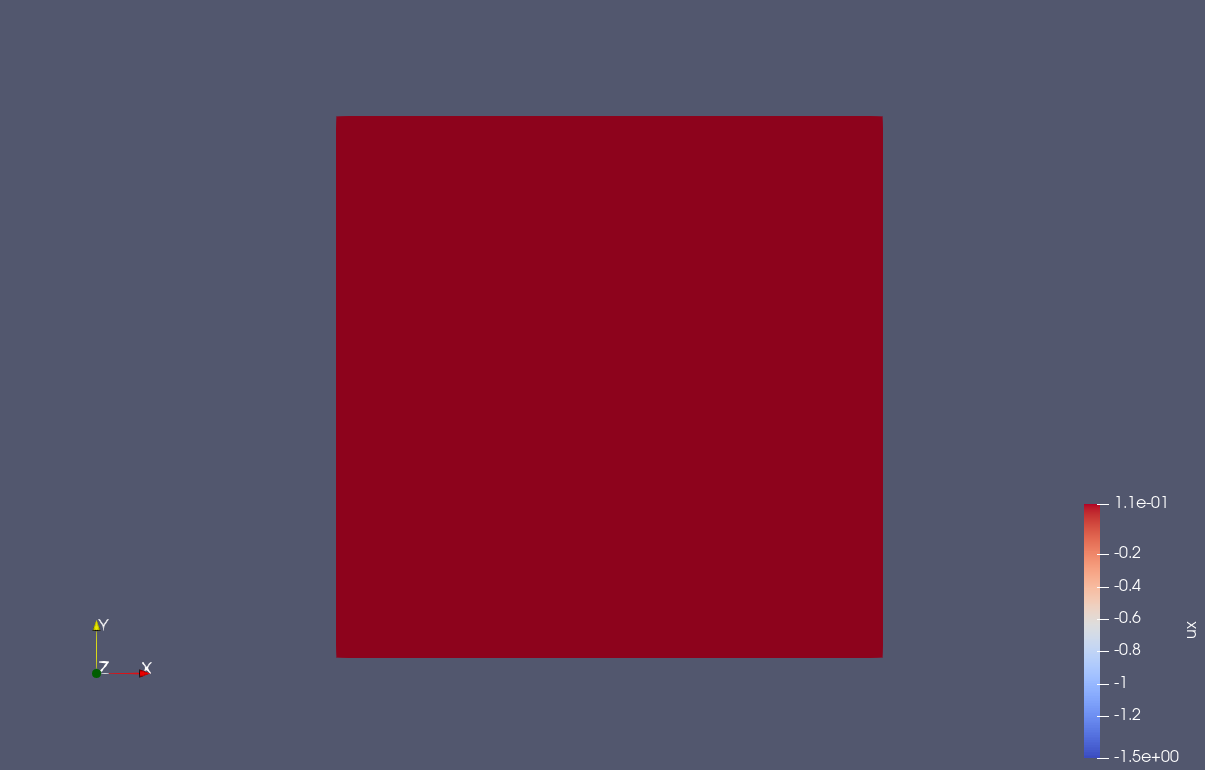

## U PLOT

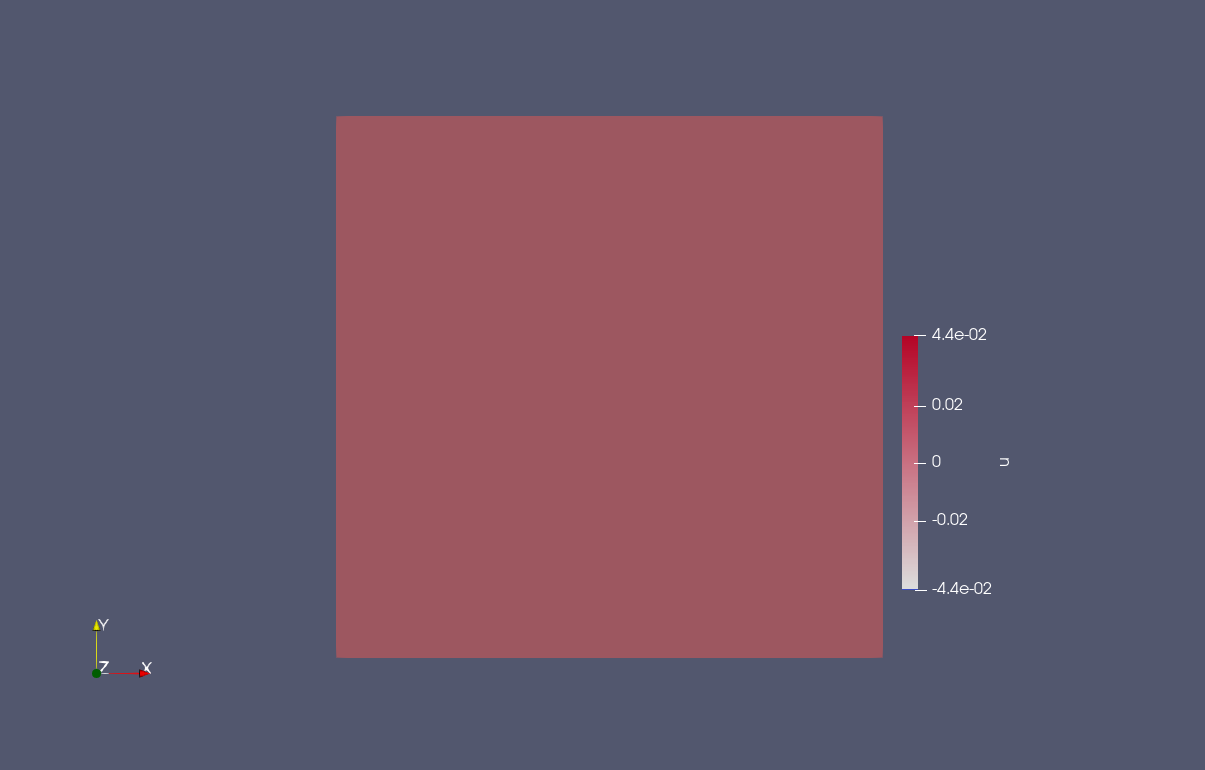